### Imports

In [1]:
import json
import sys
sys.path.append('../')
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib
from utils import *

### Read metadata file

In [2]:
f = open('Data/metadata.json')
metadata = json.load(f)

In [3]:
# view metadata present in the file
metadata

{'min_pitch': 165,
 'max_pitch': 440,
 'start_time': 500,
 'duration': 30,
 'vocal_audio_path': 'Data/NIR_VS_Bhoop_Vox.wav',
 'mix_audio_path': 'Data/NIR_VS_Bhoop_StereoMix.wav',
 'cycle_file': 'Data/NIR_VS_Bhoop_Metre_VilambitEktal-edited.csv',
 'tonic': 220,
 'notes': [{'label': 'P_', 'cents': -500},
  {'label': 'D_', 'cents': -300},
  {'label': 'S', 'cents': 0},
  {'label': 'R', 'cents': 200},
  {'label': 'G', 'cents': 400},
  {'label': 'P', 'cents': 700},
  {'label': 'D', 'cents': 900},
  {'label': "S'", 'cents': 1200},
  {'label': "R'", 'cents': 1400},
  {'label': "G'", 'cents': 1600},
  {'label': "P'", 'cents': 1900}],
 'num_div': 4}

### Play The Audio Being Analysed

In [4]:
playAudio(audioPath=metadata['mix_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'])

### Initialise And Populate The Figure

In [5]:
%%capture
# initialise figure, with 3 subplots
fig, axs = generateFig(3, (14, 7), [2, 3, 3])

In [6]:
# plot waveplot
axs[0] = drawWave(audioPath=metadata['mix_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], ax=axs[0], annotate=True, cyclePath=metadata['cycle_file'], numDiv=metadata['num_div'], annotLabel=False, xlabel=False)
# plot spetogram
axs[1] = spectrogram(audioPath=metadata['mix_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], cmap='Blues', ax=axs[1], yticks=True, annotate=True, cyclePath=metadata['cycle_file'], numDiv=metadata['num_div'], annotLabel=False, xlabel=False)
# plot pitch contour
axs[2] = pitchCountour(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], minPitch=metadata['min_pitch'], maxPitch=metadata['max_pitch'], notes=metadata['notes'], tonic=metadata['tonic'], ax=axs[2], annotate=True, cyclePath=metadata['cycle_file'], numDiv=metadata['num_div'], xticks=True, yticks=True)

/home/nithya/anaconda3/envs/osfVis/lib/python3.9/site-packages/librosa/display.py:848: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  out = axes.pcolormesh(x_coords, y_coords, data, **kwargs)


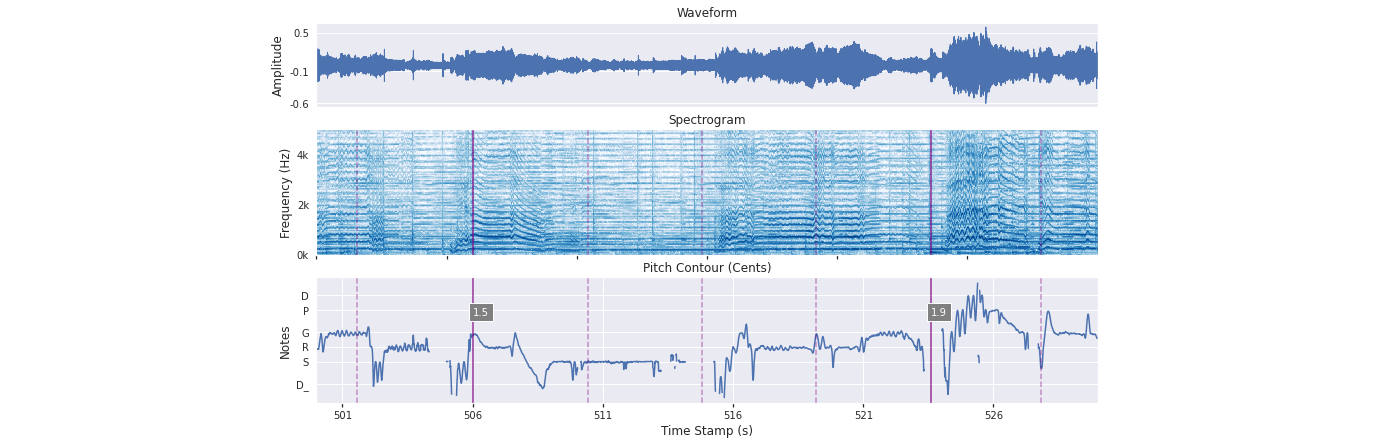

In [7]:
# display figure
fig